In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multidimga import MultiDimGA
# %matplotlib

In [2]:
"""
f(x1,x2) = e ^ sin(x1^2) + x2, x1 ∈[−2,2],x2∈[0,1].
"""
f = lambda x, y: np.e ** (np.sin(x**2)) + y

intervals = np.array([
    [-2, 2], 
    [0, 1]
])

In [3]:
x = np.linspace(intervals[0][0], intervals[0][1], 100)
y = np.linspace(intervals[1][0], intervals[1][1], 100)

xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

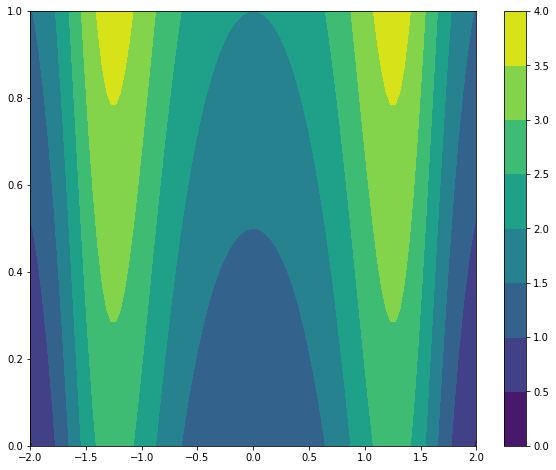

In [4]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1, 1, 1)
plt.contourf(xx, yy, zz)
plt.colorbar()

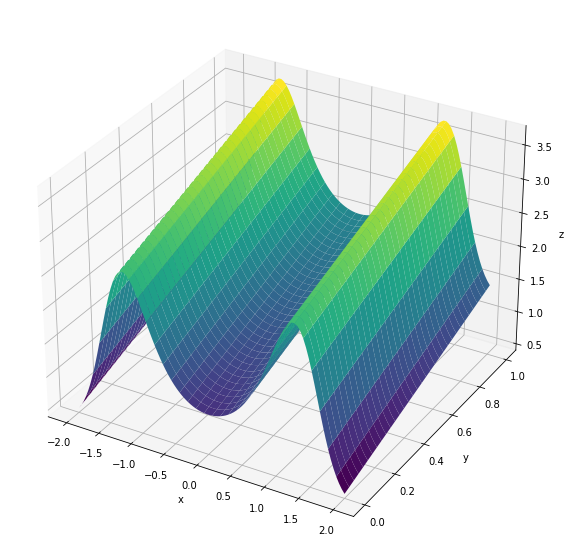

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', rstride=3, cstride=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [6]:
h = 1e-10
n = 100
tournament_n=5
mutation_p=0.1
crossbreeding_p=0.9
max_iter = 200
max_no_conv_iter = 20


multi_dim_ga = MultiDimGA()
x, y = multi_dim_ga.solve(f,
                         intervals=intervals, 
                         h=h, 
                         n=n,
                         tournament_n=tournament_n,
                         mutation_p=mutation_p,
                         crossbreeding_p=crossbreeding_p,
                         max_iter=max_iter,
                         max_no_conv_iter=max_no_conv_iter,
                         max=True)

In [7]:
print(f"x1: {x[0]}\nx2: {x[1]}\ny:  {y}")

x1: 1.2499999958563421
x2: 0.9999999999417923
y:  3.7181882819514502


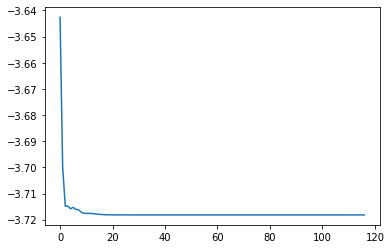

In [8]:
plt.plot(multi_dim_ga.history)
plt.show()

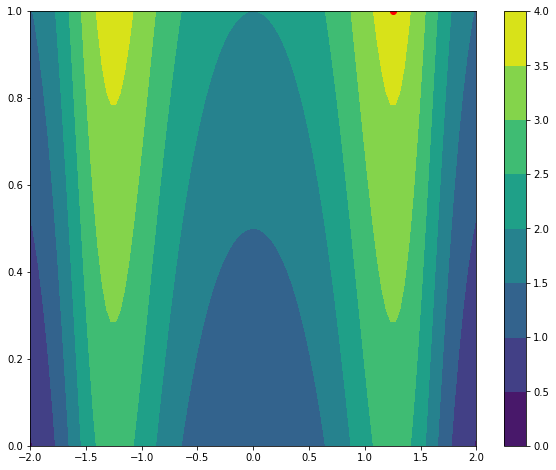

In [9]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[0], x[1], "or")
plt.contourf(xx, yy, zz)
plt.colorbar()